In [1]:
import numpy as np
import matplotlib.pyplot as plt
import MARIGOLD as mg
import os
import openpyxl as op

%load_ext autoreload
%autoreload 2

In [2]:
author = 'talley'
refetch = True
xl_compare = False
multiplot = False

# [-] Nondimensional, units in L/D ***If you're inputting in [m], convert to diameters
z_step = 0.01 / 0.0381

preset = 'talley'
debug = False

Talley's horizontal model uses:
- jg/vgz to calculate alpha
- Ishii Chawla to compute ur (no iteration)
- Contributions from VG, PD, TI, RC, WE
- DOE method for SEXP (SPD)
- Pre-calculates jg development based on pressure

Need to implement:
- OP_vel = 2: Talley horizontal DFM
- OP_press(?): horizontal LM? What we have right now might be sufficient
- OP_COV = 3: Void reconstruction COV model (MATLAB script has hard-coded COV values)

Definitely something wrong with pressure drop calculation

In [3]:
endpoints = [116, 244]
modes = [None, None]

In [4]:
database = None

if author == 'talley':
    cwd = os.path.abspath("H:\TRSL-H\IATE\Data\spreadsheets\\38.1mm_talley")
    # print(cwd)
    dat_to_fetch = 'database_t.dat'

    if refetch:
        mg.extractLocalDataFromDir(cwd, dump_file=dat_to_fetch, sheet_type='talley_template', debug=True)

if database == None:
    database = mg.loadProbeData(dat_to_fetch)

In [5]:
# Unique flow condition finding, for plotting and other hijinks
LoverDs = []
condor = [[0]*3 for _ in range(9)]

for cond in database:
    cond:mg.Condition

    cond.mirror(sym90=True)

    if cond.LoverD != 44:                
        cond.reconstruct_void(method='talley',avg_method='legacy_old')

    LoverDs.append(cond.LoverD)

    if cond.jf == 3.98 and cond.jgref == 0.15:
        run_ID = 1
    elif cond.jf == 3.98 and cond.jgref == 0.25:
        run_ID = 2
    elif cond.jf == 4.98 and cond.jgref == 0.15:
        run_ID = 3
    elif cond.jf == 4.98 and cond.jgref == 0.25:
        run_ID = 4
    elif cond.jf == 4.98 and cond.jgref == 0.50:
        run_ID = 5
    elif cond.jf == 5.98 and cond.jgref == 0.15:
        run_ID = 6
    elif cond.jf == 5.98 and cond.jgref == 0.25:
        run_ID = 7
    elif cond.jf == 5.98 and cond.jgref == 0.50:
        run_ID = 8
    elif cond.jf == 5.98 and cond.jgref == 1.00:
        run_ID = 9

    if cond.LoverD == 44:
        port_ID = 1
    elif cond.LoverD == 116:
        port_ID = 2
    elif cond.LoverD == 244:
        port_ID = 3

    condor[run_ID-1][port_ID-1] = cond

sp = np.min(LoverDs)
print(f"\nsp: {sp}")

\\helios.ecn.purdue.edu\kang284\trsl-h\python_modules\marigold\src\MARIGOLD\Condition.py:174: UserWarning: Converting phi_in to np.ndarray
  warnings.warn("Converting phi_in to np.ndarray")
\\helios.ecn.purdue.edu\kang284\trsl-h\python_modules\marigold\src\MARIGOLD\Condition.py:178: UserWarning: Converting r_in to np.ndarray
  warnings.warn("Converting r_in to np.ndarray")


'alpha'
'alpha'
'alpha'
'alpha'
'alpha'
'alpha'
'alpha'
'alpha'
'alpha'

	r/R_end: 0.3
	alpha_peak: [0.28045645]
	⟨α⟩_data: 0.034
	⟨α⟩_reconstructed: 0.03399999930341882
'alpha'
'alpha'
'alpha'
'alpha'
'alpha'
'alpha'
'alpha'
'alpha'
'alpha'

	r/R_end: 0.3
	alpha_peak: [0.31345133]
	⟨α⟩_data: 0.038
	⟨α⟩_reconstructed: 0.037999999498694204
'alpha'
'alpha'
'alpha'
'alpha'
'alpha'
'alpha'
'alpha'
'alpha'
'alpha'

	r/R_end: 0.3
	alpha_peak: [0.47842572]
	⟨α⟩_data: 0.058
	⟨α⟩_reconstructed: 0.05799999942653757
'alpha'
'alpha'
'alpha'
'alpha'
'alpha'
'alpha'
'alpha'
'alpha'

	r/R_end: 0.3
	alpha_peak: [0.54441548]
	⟨α⟩_data: 0.066
	⟨α⟩_reconstructed: 0.06599999985939213
'alpha'
'alpha'
'alpha'
'alpha'
'alpha'
'alpha'
'alpha'
'alpha'
'alpha'
'alpha'
'alpha'


\\helios.ecn.purdue.edu\kang284\trsl-h\python_modules\marigold\src\MARIGOLD\Condition.py:3341: UserWarning: Minimization did not return a successful result
  warnings.warn("Minimization did not return a successful result")


ABNORMAL_TERMINATION_IN_LNSRCH

	r/R_end: -0.2
	alpha_peak: [0.08123999]
	⟨α⟩_data: 0.021
	⟨α⟩_reconstructed: 0.021000001502222435
'alpha'
'alpha'
'alpha'
'alpha'
'alpha'
'alpha'
'alpha'
'alpha'
'alpha'
'alpha'
'alpha'
'alpha'
'alpha'

	r/R_end: -0.2
	alpha_peak: [0.10058283]
	⟨α⟩_data: 0.026
	⟨α⟩_reconstructed: 0.02599999806492917
'alpha'
'alpha'
'alpha'
'alpha'
'alpha'
'alpha'
'alpha'
'alpha'
'alpha'
'alpha'
'alpha'

	r/R_end: -0.2
	alpha_peak: [0.12379425]
	⟨α⟩_data: 0.032
	⟨α⟩_reconstructed: 0.03199999870753295
'alpha'
'alpha'
'alpha'
'alpha'
'alpha'
'alpha'
'alpha'
'alpha'
'alpha'
'alpha'
'alpha'
'alpha'
'alpha'
'alpha'
'alpha'
'alpha'
ABNORMAL_TERMINATION_IN_LNSRCH

	r/R_end: -0.2
	alpha_peak: [0.16247997]
	⟨α⟩_data: 0.042
	⟨α⟩_reconstructed: 0.042000001608639564
'alpha'
'alpha'
'alpha'
'alpha'
'alpha'
'alpha'
'alpha'
'alpha'
'alpha'
'alpha'
'alpha'
'alpha'
'alpha'
ABNORMAL_TERMINATION_IN_LNSRCH

	r/R_end: -0.2
	alpha_peak: [0.23211424]
	⟨α⟩_data: 0.06
	⟨α⟩_reconstructed: 0.06000

In [10]:
# passkey = ('cond.jf == 3.98 and cond.jgref == 0.25')
passkey = 'True'
# passkey = 'i < 2'

In [ ]:
# Weber number
We_cr = 5       # Talley, 2012
We_cr = 4.9     # Relaxed criterion
We_cr = 6       # Ishii and Kim, 2001

We_cr = 8       # Prabhudharwadkar et al., 2009

# Kataoka et al. 1983 for droplet flows


jf=3.98_jgloc=0.09_theta=0.0_port=44D_Talley
	_________________________________________________________
	                         COV_RC                          
	jf = 3.98, jgref = 0.15, L/D = 44
		rho_m: 968.03904	mu_m: 0.0010330578512396695	v_m: 4.111522142743334	Rem: 151642.3414188	f_TP: 0.016144073380523746	eps: 14.73
		Dsm_exp: 0.0020299999999999997	alpha_str_avg: 0.03190833333333334	ai_avg: 94.27

		u_t_avg: 0.434599850403565

	COV_RC: 0.8426193914913253	COV_RC_num: 6056.825473628846	COV_RC_den: 7188.091723012763
	_________________________________________________________
	                         COV_TI                          
	jf = 3.98, jgref = 0.15, L/D = 44
		rho_m: 968.03904	mu_m: 0.0010330578512396695	v_m: 4.111522142743334	Rem: 151642.3414188	f_TP: 0.016144073380523746	eps: 14.73
		Dsm_exp: 0.0020299999999999997	alpha_str_avg: 0.03190833333333334	ai_avg: 94.27
			90.0	1.00	|	alpha: 0.0000	COV_TI_loc: 0.0000	u_t: 0.0	We: 0.0
			90.0	0.95	|	alpha: 0.2242	COV_TI_loc: 0.00

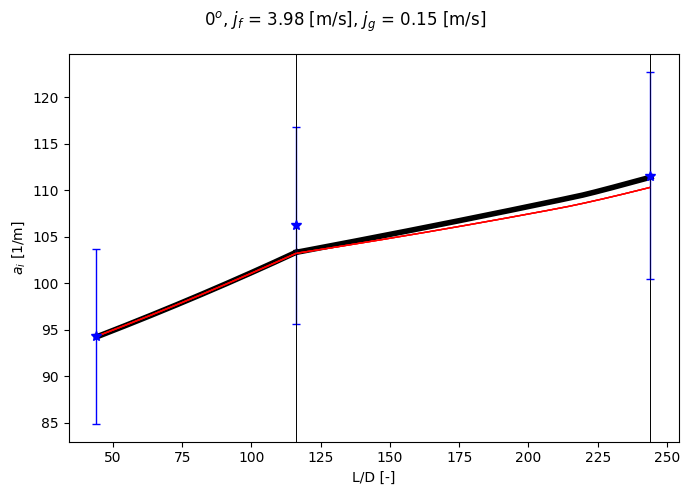

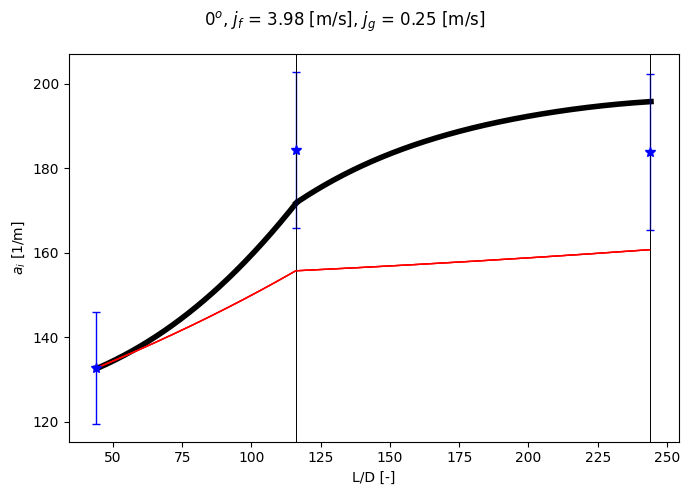

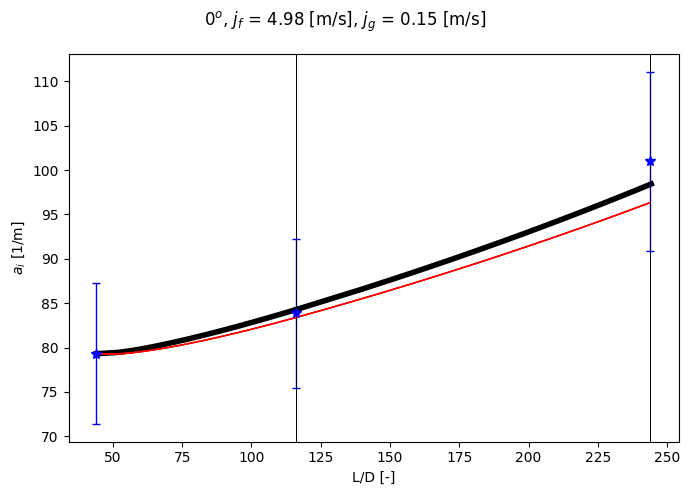

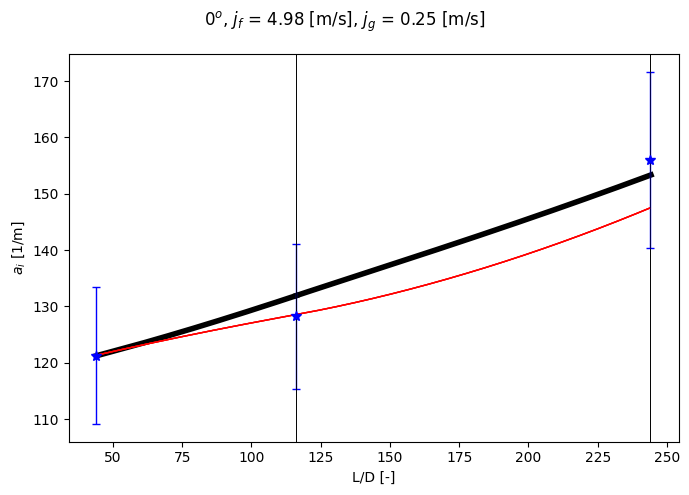

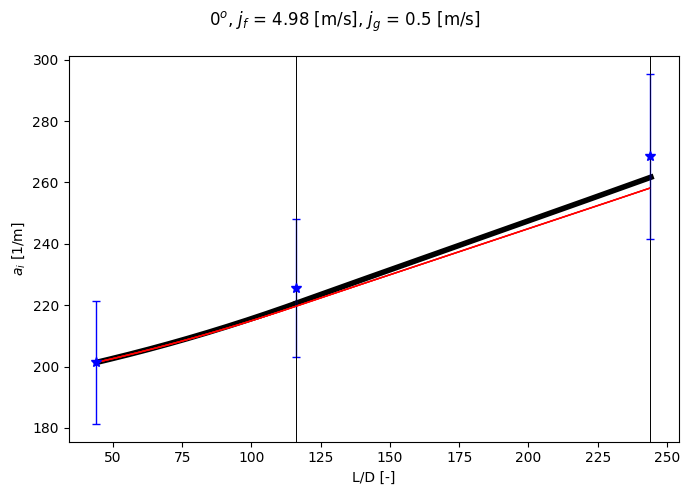

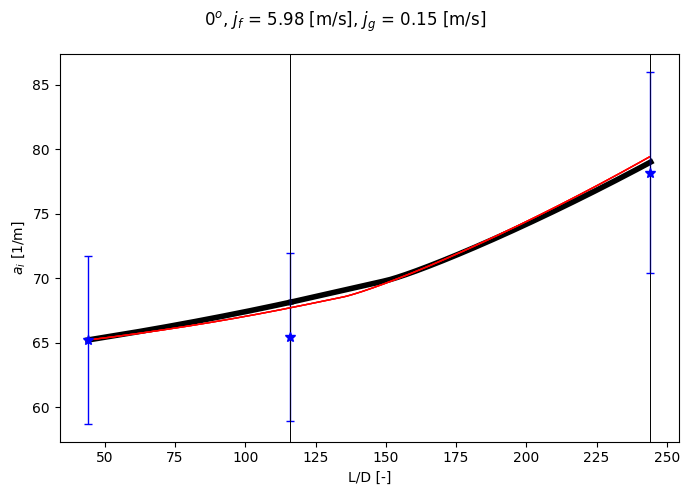

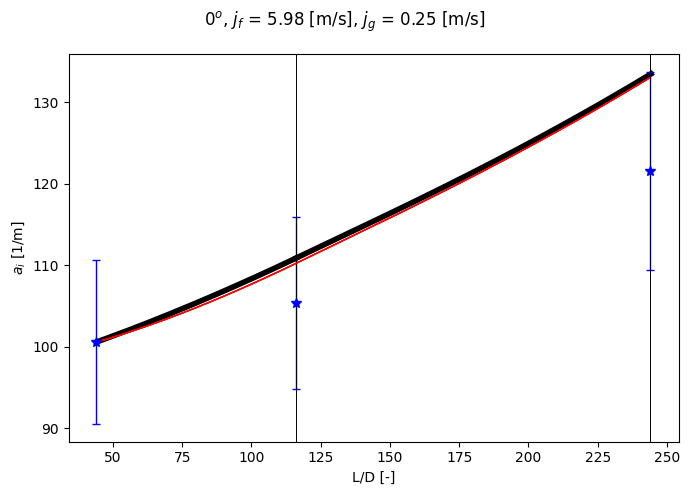

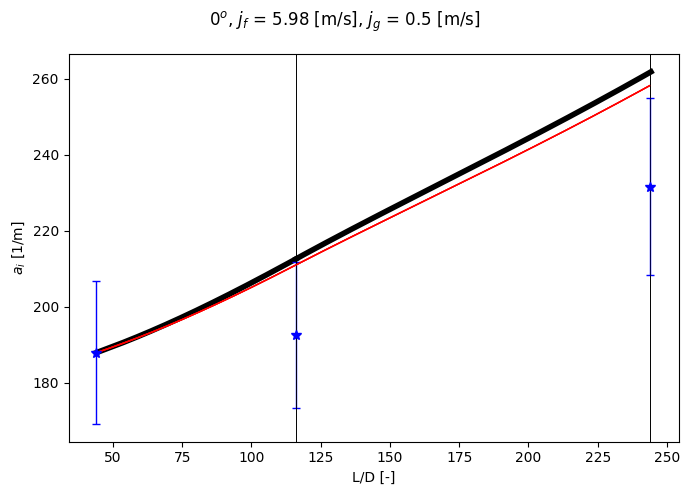

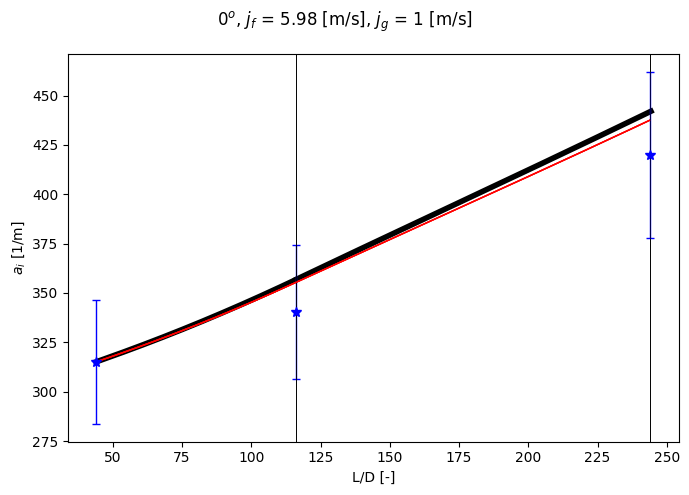

In [12]:
for i, cond in enumerate([row[0] for row in condor]):
    cond:mg.Condition

    if eval(passkey):
        print(cond)
        
        cond.mirror(sym90=True)     # Paranoia paranoia

        # Plot preparation
        plt.figure(i,figsize=(7,5))
        plt.suptitle("${}^o$, $j_f$ = {} [m/s], $j_g$ = {} [m/s]".format(int(cond.theta),cond.jf,cond.jgref))

        if i == 0 or i == 1:
            void_method = 'vgz_interp'
        else:
            void_method = 'vgz_talley'

        ai_st = 0
        if cond.LoverD == sp:
            for ii, cp in enumerate(endpoints):

                if ii == 0:
                    io = mg.iate_1d_1g(
                        cond, query = cp, z_step = z_step, We_cr = We_cr, void_method = void_method,
                        restriction = modes[ii], debug = debug, preset = preset,
                        cond2 = condor[i][ii+1]
                        )
                
                    label_ai = 'ai'
                    label_ti = 'TI'
                    label_rc = 'RC'
                    label_exp = 'EXP'
                    label_we = 'WE'
                    label_vg = 'VG'

                else:
                    print(cond)
                    io = mg.iate_1d_1g(
                        condor[i][ii], query = cp, z_step = z_step, io = io, We_cr = We_cr, void_method = void_method,
                        restriction = modes[ii], debug = debug, preset = preset,
                        cond2 = condor[i][ii+1]
                        )
                    
                    label_ai = None
                    label_ti = None
                    label_rc = None
                    label_exp = None
                    label_we = None
                    label_vg = None
                
                z_mesh  = io["z_mesh"]
                ai      = io["ai"]
                aiti    = io["aiti"]
                airc    = io["airc"]
                aiexp   = io["aiexp"]
                aiwe    = io["aiwe"]
                aivg    = io["aivg"]
                alpha   = io["alpha"]
                pz      = io["pz"]

                z_mesh = z_mesh / cond.Dh

                if multiplot:
                    plt.figure(i)
                    plt.subplot(221)
                    plt.plot(z_mesh,ai,'k',linewidth=3)
                    plt.ylabel('$a_i$ [1/m]')
                    plt.xlabel('L/D [-]')

                    plt.figure(i)
                    plt.subplot(222)
                    plt.plot(z_mesh,ai-ai[0]+ai_st,'k',linewidth=4,label=label_ai)
                    plt.plot(z_mesh,aiti,'b',linestyle=(0,(3,3)),linewidth=2,label=label_ti)
                    plt.plot(z_mesh,-airc,'r',linestyle='dotted',linewidth=4,label=label_rc)
                    plt.plot(z_mesh,aiexp,'aqua',linewidth=2,label=label_exp)
                    plt.plot(z_mesh,-aiwe,'lime',linestyle=(0,(3,1,1,1)),linewidth=2,label=label_we)
                    plt.plot(z_mesh,-aivg,'magenta',linestyle=(0,(1,1)),linewidth=2,label=label_vg)
                    plt.legend(loc='upper right')
                    plt.ylabel(r'$\Delta$$a_i$ [1/m]')
                    plt.xlabel('L/D [-]')
                    # plt.ylim(bottom = -10, top = 60)

                    plt.figure(i)
                    plt.subplot(223)
                    plt.plot(z_mesh,alpha,'k',linewidth=3)
                    plt.ylabel(r'$\alpha$ [-]')
                    plt.xlabel('L/D [-]')

                    plt.figure(i)
                    plt.subplot(224)
                    plt.plot(z_mesh,pz,'k',linewidth=3)
                    plt.ylabel('$p_{z}$ [Pa]')
                    plt.xlabel('L/D [-]')
                    
                else:
                    plt.figure(i)
                    plt.plot(z_mesh,ai,'k',linewidth=4)
                    plt.ylabel('$a_i$ [1/m]')
                    plt.xlabel('L/D [-]')

                    # plt.figure(i)
                    # plt.plot(z_mesh,ai-ai[0]+ai_st,'k',linewidth=4,label=label_ai)
                    # plt.plot(z_mesh,aiti,'b',linestyle=(0,(3,3)),linewidth=2,label=label_ti)
                    # plt.plot(z_mesh,-airc,'r',linestyle='dotted',linewidth=4,label=label_rc)
                    # plt.plot(z_mesh,aiexp,'aqua',linewidth=2,label=label_exp)
                    # plt.plot(z_mesh,-aiwe,'lime',linestyle=(0,(3,1,1,1)),linewidth=2,label=label_we)
                    # plt.plot(z_mesh,-aivg,'magenta',linestyle=(0,(1,1)),linewidth=2,label=label_vg)
                    # plt.legend(loc='upper right')
                    # plt.ylabel(r'$\Delta$$a_i$ [1/m]')
                    # plt.xlabel('L/D [-]')
                    # plt.xlim(left = 20, right = 120)
                    # plt.ylim(bottom = -10, top = 60)

                ai_st = ai_st + ai[-1] - ai[0]

for i, row in enumerate([row for row in condor]):
    for ii, cond in enumerate([col for col in row]):
        cond:mg.Condition
        
        if eval(passkey):

            perr = 0.1

            if multiplot:
                plt.figure(i)
                plt.subplot(221)
                plt.errorbar(cond.LoverD,cond.area_avg('ai',method='legacy_old'),cond.area_avg('ai',method='legacy_old')*perr,fmt='b*',markersize=7,elinewidth=1,capsize=3,label='exp')

                if xl_compare == True and cond.area_avg_ai_sheet != '#REF!':
                    plt.figure(i)
                    plt.subplot(221)
                    plt.errorbar(cond.LoverD,cond.area_avg_ai_sheet,cond.area_avg_ai_sheet*perr,fmt='rx',markersize=7,elinewidth=1,capsize=3,label='exp')

                plt.figure(i)
                plt.subplot(222)

                plt.figure(i)
                plt.subplot(223)
                plt.errorbar(cond.LoverD,cond.area_avg('alpha',method='legacy_old'),cond.area_avg('alpha',method='legacy_old')*perr,fmt='b*',markersize=7,elinewidth=1,capsize=3)

                if xl_compare == True and cond.area_avg_void_sheet != '#REF!':
                    plt.figure(i)
                    plt.subplot(223)
                    plt.errorbar(cond.LoverD,cond.area_avg_void_sheet,cond.area_avg_void_sheet*perr,fmt='rx',markersize=7,elinewidth=1,capsize=3)

                p = (cond.jgatm * 101325 / cond.jgloc)
                # print(f"jgatm: {cond.jgatm}\tjgloc: {cond.jgloc}")

                plt.figure(i)
                plt.subplot(224)
                plt.errorbar(cond.LoverD,p,p*perr,fmt='b*',markersize=7,elinewidth=1,capsize=3)

                if xl_compare == True:
                    wb = op.load_workbook(filename="H:\TRSL-H\IATE\Legacy\Talley_Suite\H\standard_talley.xlsx", data_only=True)

                    ws = wb['p_exp']
                    talley_p_exp = np.zeros((9,3))
                    for ridx, row in enumerate(ws.iter_rows(min_row=1,max_row=9,values_only=True)):
                        for cidx, value in enumerate(row):
                            talley_p_exp[ridx][cidx] = value

                    plt.figure(i)
                    plt.subplot(224)
                    plt.errorbar(cond.LoverD,talley_p_exp[i][ii],talley_p_exp[i][ii]*perr,fmt='rx',markersize=7,elinewidth=1,capsize=3)

                for iii, cp in enumerate(endpoints):
                    plt.figure(i)

                    plt.subplot(221)
                    plt.axvline(x=endpoints[iii],linestyle='-',linewidth=0.5,c='k')
                    plt.subplot(222)
                    plt.axvline(x=endpoints[iii],linestyle='-',linewidth=0.5,c='k')
                    plt.subplot(223)
                    plt.axvline(x=endpoints[iii],linestyle='-',linewidth=0.5,c='k')
                    plt.subplot(224)
                    plt.axvline(x=endpoints[iii],linestyle='-',linewidth=0.5,c='k')

                plt.tight_layout()
            
            else:
                plt.figure(i)
                plt.errorbar(cond.LoverD,cond.area_avg('ai',method='legacy_old'),cond.area_avg('ai',method='legacy_old')*perr,fmt='b*',markersize=7,elinewidth=1,capsize=3,label='exp')

                if xl_compare == True and cond.area_avg_ai_sheet != '#REF!':
                    plt.figure(i)
                    plt.errorbar(cond.LoverD,cond.area_avg_ai_sheet,cond.area_avg_ai_sheet*perr,fmt='rx',markersize=7,elinewidth=1,capsize=3,label='exp')

                for iii, cp in enumerate(endpoints):
                    plt.figure(i)
                    plt.axvline(x=endpoints[iii],linestyle='-',linewidth=0.5,c='k')

                plt.tight_layout()
                
            #######################################################################################################################################################################
            # Compare against Excel standard
            if True:
                wb = op.load_workbook(filename="H:\TRSL-H\IATE\Legacy\Talley_Suite\H\standard_talley.xlsx", data_only=True)

                ws = wb['z']
                talley_z = []
                for row in ws.iter_rows(min_row=1,max_row=1,values_only=True):
                    for value in row:
                        talley_z.append(value)

                ws = wb['ai']
                talley_ai = np.zeros((9,len(talley_z)))
                for ridx, row in enumerate(ws.iter_rows(min_row=1,max_row=9,values_only=True)):
                    for cidx, value in enumerate(row):
                        talley_ai[ridx][cidx] = value

                ws = wb['alpha']
                talley_alpha = np.zeros((9,len(talley_z)))
                for ridx, row in enumerate(ws.iter_rows(min_row=1,max_row=9,values_only=True)):
                    for cidx, value in enumerate(row):
                        talley_alpha[ridx][cidx] = value
                
                ws = wb['pressure']
                talley_pressure = np.zeros((9,len(talley_z)))
                for ridx, row in enumerate(ws.iter_rows(min_row=1,max_row=9,values_only=True)):
                    for cidx, value in enumerate(row):
                        talley_pressure[ridx][cidx] = value

                plt.figure(i)
                ls = '-' #'dotted'#(0,(3,5))
                lw = 1
                lc = 'r'

                if multiplot:
                    plt.subplot(221)
                plt.plot(talley_z,talley_ai[i],lc,linestyle=ls,linewidth=lw)
                
                if multiplot:
                    plt.subplot(223)
                    plt.plot(talley_z,talley_alpha[i],lc,linestyle=ls,linewidth=lw)

                    plt.subplot(224)
                    plt.plot(talley_z,talley_pressure[i],lc,linestyle=ls,linewidth=lw)

                # if not multiplot:
                #     plt.xlim(left = 0, right = 300)
                #     plt.ylim(bottom = 0, top = 300)

                wb.close()

In [52]:
print(f"\tCOV_RC\t\t\t\tCOV_TI")
print(f"P1\tP2\tP3\t\tP1\tP2\tP3")

p_atm = 101353


for i in range(np.shape(condor)[0]):
    for ii in range(np.shape(condor)[1]):
        cond = condor[i][ii]

        print(f"{round(cond.COV_RC,3)}\t",end='')

    print(f"\t",end='')
    for ii in range(np.shape(condor)[1]):
        cond = condor[i][ii]

        print(f"{round(cond.COV_TI,3)}\t",end='')

    print(f"\n",end='')

print(f"\n",end='')

print(f"\t\tPressure")
print(f"P1\t\tP2\t\tP3")

for i in range(np.shape(condor)[0]):
    for ii in range(np.shape(condor)[1]):
        cond = condor[i][ii]

        print(f"{round(cond.jgatm * p_atm / cond.jgloc ,3)}\t",end='')

    print(f"\n",end='')

	COV_RC				COV_TI
P1	P2	P3		P1	P2	P3
0.843	0.563	0.573		0.271	nan	0.216	
0.431	0.067	0.033		0.104	nan	0.044	
3.497	2.703	2.772		nan	nan	nan	
1.135	2.146	1.137		0.56	nan	0.61	
0.328	0.463	0.194		0.188	0.344	0.199	
2.917	1.515	1.526		1.219	nan	0.889	
3.29	1.546	1.55		0.904	0.991	0.982	
0.741	1.606	1.257		0.422	0.993	0.874	
0.249	0.333	0.142		0.272	0.392	0.226	

		Pressure
P1		P2		P3
162772.484	153565.152	136963.514	
162633.184	152640.06	136227.151	
181419.451	168921.667	144790.0	
190656.509	177190.559	151726.048	
196040.619	181636.201	154974.006	
226234.375	205445.27	170819.663	
224430.912	204340.726	170055.369	
226436.55	206842.857	170627.946	
235321.57	214276.956	176266.087	


In [49]:
print(cond.area_avg_void_sheet)
print(cond.area_avg('alpha',method='legacy_old'))

0.101973
0.10197300000000002


In [10]:
# for cond in database:
#     cond:mg.Condition

#     if cond.LoverD == 244:
#         cond.mirror(sym90=True)
#         cond.calc_COV_RC(reconstruct_flag = True)
#         cond.calc_COV_TI(reconstruct_flag = True)

#         if True:
#             title = f"${cond.theta}^o$, $j_f$ = {cond.jf} [m/s], $j_g$ = {cond.jgref} [m/s], {cond.LoverD}D"

#             # print(f"error: {cond.calc_errors('alpha','alpha_reconstructed')}")
#             cond.plot_contour(param = 'alpha', num_levels = 100, colormap = 'jet', cartesian = False)
#             cond.plot_contour(param = 'alpha_reconstructed', num_levels = 100, colormap = 'jet', cartesian = False, plot_measured_points = False)
#             X = cond.plot_profiles2(param = 'alpha_reconstructed', title = title, legend_loc = 'lower right', label_str = "$<α>_{reconstructed}$")

angle: 90 	r*: 1.0 	alpha: 0.0
angle: 90 	r*: 0.95 	alpha: 0.15672566555194972
angle: 90 	r*: 0.9 	alpha: 0.3134513311038991
angle: 90 	r*: 0.85 	alpha: 0.28733038684524087
angle: 90 	r*: 0.8 	alpha: 0.2612094425865826
angle: 90 	r*: 0.7 	alpha: 0.20896755406926604
angle: 90 	r*: 0.6 	alpha: 0.15672566555194953
angle: 90 	r*: 0.5 	alpha: 0.10448377703463303
angle: 90 	r*: 0.4 	alpha: 0.05224188851731653
angle: 90 	r*: 0.2 	alpha: 0.0
angle: 90 	r*: 0.0 	alpha: 0.0
angle: 90 	r*: 0.05 	alpha: 0.0
angle: 90 	r*: 0.1 	alpha: 0.0
angle: 90 	r*: 0.15000000000000002 	alpha: 0.0
angle: 90 	r*: 0.25 	alpha: 0.0
angle: 90 	r*: 0.30000000000000004 	alpha: 2.900007374091269e-17
angle: 90 	r*: 0.35000000000000003 	alpha: 0.02612094425865828
angle: 90 	r*: 0.45 	alpha: 0.07836283277597478
angle: 90 	r*: 0.55 	alpha: 0.13060472129329131
angle: 90 	r*: 0.6000000000000001 	alpha: 0.15672566555194958
angle: 90 	r*: 0.65 	alpha: 0.18284660981060782
angle: 90 	r*: 0.7000000000000001 	alpha: 0.20896755406

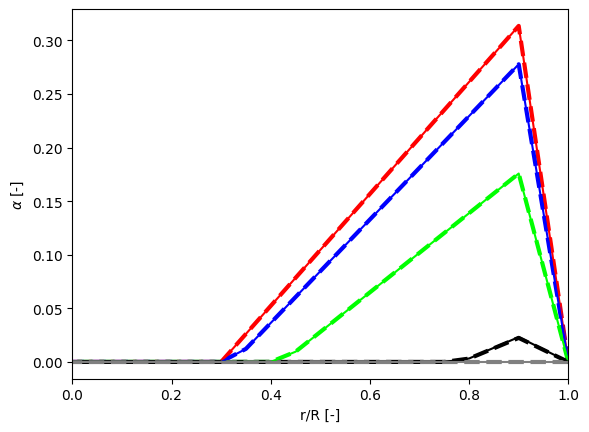

In [13]:
for cond in database:
    cond:mg.Condition

    if cond.jf == 3.98 and cond.jgref == 0.15 and cond.LoverD == 244:
        wb = op.load_workbook(filename="H:\TRSL-H\IATE\Legacy\Talley_Suite\H\standard_talley.xlsx", data_only=True)
        ws = wb['void_reconstruct_2']

        talley_rec = np.zeros((41,5))
        for ridx, row in enumerate(ws.iter_rows(min_row=1,max_row=41,values_only=True)):
            for cidx, value in enumerate(row):
                talley_rec[ridx][cidx] = value

        fig = plt.figure()
        ax1 = fig.add_subplot(111)

        ls = 'dashed'
        lw = 3
        mkr = ''

        r_points = np.arange(-1,1.05,0.05)
        r_points = r_points[::-1]

        ax1.plot(r_points,talley_rec[:,0],color='r',marker=mkr,linestyle=ls,linewidth=lw)
        ax1.plot(r_points,talley_rec[:,1],color='b',marker=mkr,linestyle=ls,linewidth=lw)
        ax1.plot(r_points,talley_rec[:,2],color='lime',marker=mkr,linestyle=ls,linewidth=lw)
        ax1.plot(r_points,talley_rec[:,3],color='k',marker=mkr,linestyle=ls,linewidth=lw)
        ax1.plot(r_points,talley_rec[:,4],color='gray',marker=mkr,linestyle=ls,linewidth=lw)

        ls = 'solid'
        lw = 1.5
        mkr = ''

        alpha_rec = []
        i = 0
        cs = ['r','b','lime','k','gray']
        for angle, r_dict in cond.data.items():
            if angle <= 90:
                rs = []
                vals = []

                for rstar, midas_dict in r_dict.items():
                    if rstar >= 0:
                        rs.append(rstar)
                        vals.append(midas_dict['alpha_reconstructed'])

                        print(f"angle: {angle} \tr*: {rstar} \talpha: {midas_dict['alpha_reconstructed']}")
                    
                vals = [var for _, var in sorted(zip(rs, vals))]
                rs = sorted(rs)

                ax1.plot(rs,vals,color=cs[i],marker=mkr,linestyle=ls,linewidth=lw)
                plt.xlim(0,1)
                plt.xlabel('r/R [-]')
                plt.ylabel(r'$\alpha$ [-]')
                i = i + 1

        wb.close()
